In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [2]:
df = pd.read_csv('dataset_space_API_past_launches_raw.csv')

# Data Wrangling

In [5]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006/3/24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007/3/21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008/9/28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009/7/13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010/6/4,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857


In [6]:
# get numeric column
df._get_numeric_data().head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
0,1,20.0,1,False,False,False,NaN,0,167.743129,9.047721
1,2,NaN,1,False,False,False,NaN,0,167.743129,9.047721
2,4,165.0,1,False,False,False,NaN,0,167.743129,9.047721
3,5,200.0,1,False,False,False,NaN,0,167.743129,9.047721
4,6,NaN,1,False,False,False,1.0,0,-80.577366,28.561857


In [7]:
Date_count = df['Date'].value_counts().to_frame()
BoosterVersion_count = df['BoosterVersion'].value_counts().to_frame()
PayloadMass_count = df['PayloadMass'].value_counts().to_frame()
Orbit_count = df['Orbit'].value_counts().to_frame()
LaunchSite_count = df['LaunchSite'].value_counts().to_frame()
Outcome_count = df['Outcome'].value_counts().to_frame()
Flights_count = df['Flights'].value_counts().to_frame()
GridFins_count = df['GridFins'].value_counts().to_frame()
Reused_count = df['Reused'].value_counts().to_frame()
Legs_count = df['Legs'].value_counts().to_frame()
LandingPad_count = df['LandingPad'].value_counts().to_frame()
Block_count = df['Block'].value_counts().to_frame()
ReusedCount_count = df['ReusedCount'].value_counts().to_frame()
Serial_count = df['Serial'].value_counts().to_frame()
Longitude_count = df['Longitude'].value_counts().to_frame()
Latitude_count = df['Latitude'].value_counts().to_frame()

### the number of Falcon 9 and Falcon 1

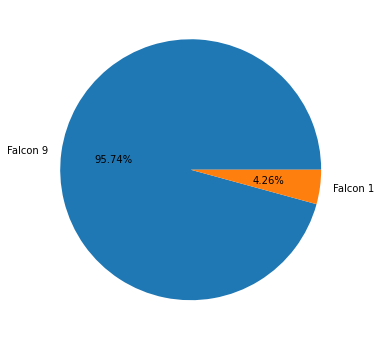

In [8]:
plt.figure(figsize = (6,6))
plt.pie(BoosterVersion_count['BoosterVersion'], 
        labels=list(BoosterVersion_count.index), 
        autopct='%.2f%%' )
plt.show()

### the number of each Orbit

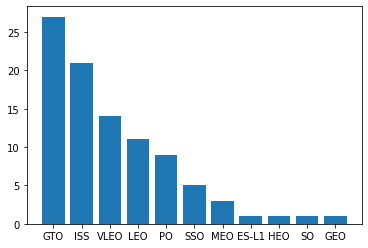

In [9]:
plt.bar(list(Orbit_count.index), Orbit_count['Orbit'])
plt.show()

### the number of each LaunchSite

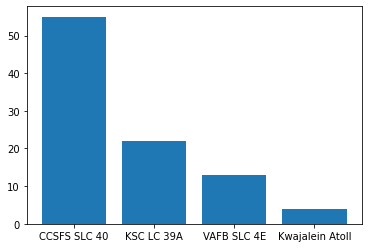

In [10]:
plt.bar(list(LaunchSite_count.index), LaunchSite_count['LaunchSite'])
plt.show()

### the number each Outcome

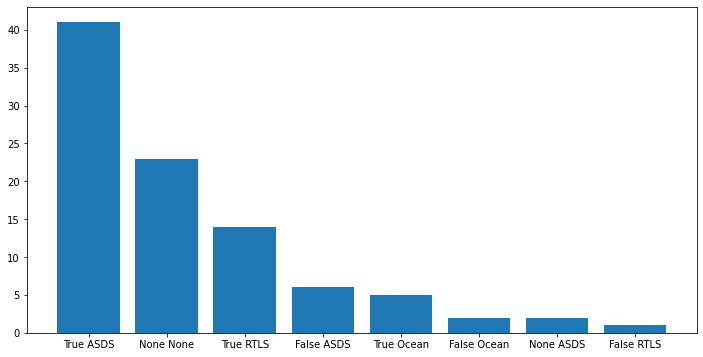

In [11]:
plt.figure(figsize = (12,6))
plt.bar(list(Outcome_count.index), Outcome_count['Outcome'])
plt.show()

### the number of each Flights

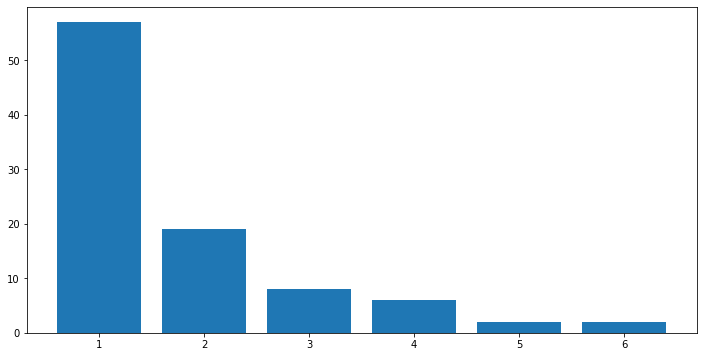

In [12]:
Flights_count
plt.figure(figsize = (12,6))
plt.bar(list(Flights_count.index), Flights_count['Flights'])
plt.show()

### Whether Grid Fins were used

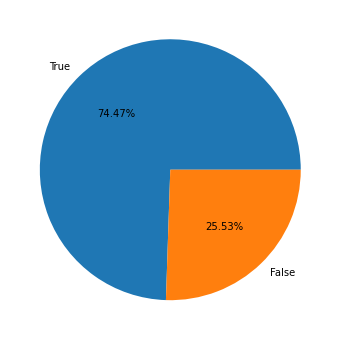

In [13]:
plt.figure(figsize = (6,6))
plt.pie(GridFins_count['GridFins'], 
        labels = list(GridFins_count.index), 
        autopct = '%.2f%%' )
plt.show()

### whether the core is reused

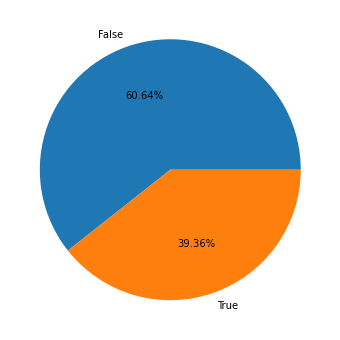

In [14]:
plt.figure(figsize = (6,6))
plt.pie(Reused_count['Reused'], 
        labels = list(Reused_count.index), 
        autopct = '%.2f%%' )
plt.show()

### whether legs were reused

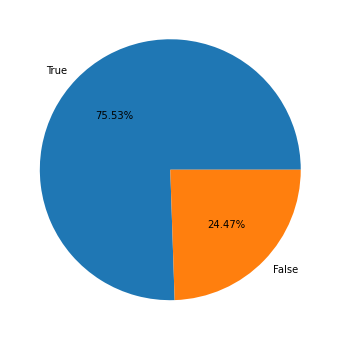

In [15]:
plt.figure(figsize = (6,6))
plt.pie(Legs_count['Legs'], 
        labels = list(Legs_count.index), 
        autopct = '%.2f%%' )
plt.show()

### number of type of landing pad used

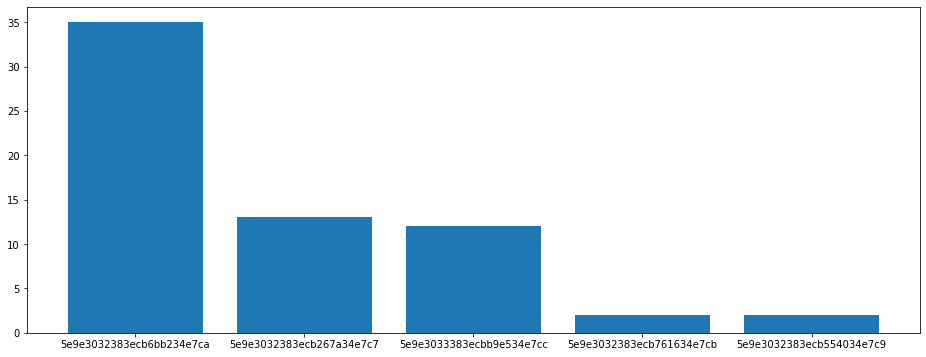

In [16]:
LandingPad_count
plt.figure(figsize = (16,6))
plt.bar(list(LandingPad_count.index), LandingPad_count['LandingPad'])
plt.show()

### Block

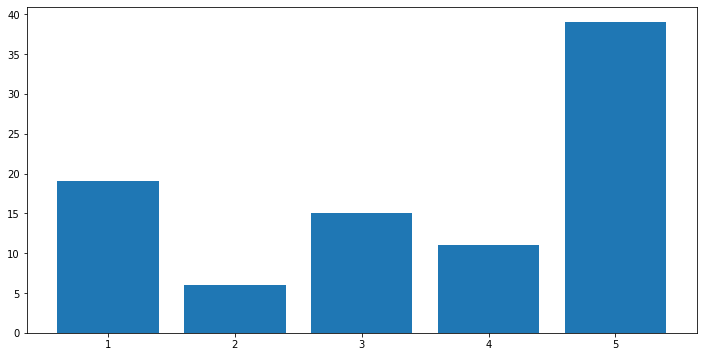

In [17]:
plt.figure(figsize = (12,6))
plt.bar(list(Block_count.index), Block_count['Block'])
plt.show()

### Serial

In [18]:
Serial_count.head()

,Serial
B1049,6
B1051,5
B1048,4
B1059,4
B1056,4


In [19]:
# Longitude_count

In [20]:
# Latitude_count

### The percentage of the missing values in each attribute

In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percentage = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percentage

,column_name,percent_missing
FlightNumber,FlightNumber,0.000000
Date,Date,0.000000
BoosterVersion,BoosterVersion,0.000000
PayloadMass,PayloadMass,6.382979
Orbit,Orbit,0.000000
LaunchSite,LaunchSite,0.000000
Outcome,Outcome,0.000000
Flights,Flights,0.000000
GridFins,GridFins,0.000000
Reused,Reused,0.000000


### Dealling with missing values

In [22]:
df_droped = df.dropna()
df_droped = df_droped.reset_index(drop=True)
df_droped.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,False ASDS,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,None ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,False ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


### Classify landing outcome as successful or unsuccessful by creating a landing outcome label from Outcome column, “1” for successful landing, “0” for the unsuccessful landing.

In [23]:
# encode the Outcome column
df_label = df_droped.replace(['True Ocean','True RTLS', 'True ASDS', 
                         'False Ocean', 'False RTLS', 'False ASDS', 'None ASDS','None None',
                         'True','False'],
                        [1,1,1,
                         0,0,0,0,0,
                         1,0])

In [24]:
df_label.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,19,2015/1/10,Falcon 9,2395.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1012,-80.577366,28.561857
1,22,2015/4/14,Falcon 9,1898.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb761634e7cb,1.0,0,B1015,-80.577366,28.561857
2,24,2015/6/28,Falcon 9,2477.0,ISS,CCSFS SLC 40,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1.0,0,B1018,-80.577366,28.561857
3,25,2015/12/22,Falcon 9,2034.0,LEO,CCSFS SLC 40,1,1,True,False,True,5e9e3032383ecb267a34e7c7,1.0,0,B1019,-80.577366,28.561857
4,26,2016/1/17,Falcon 9,553.0,PO,VAFB SLC 4E,0,1,True,False,True,5e9e3033383ecbb9e534e7cc,1.0,0,B1017,-120.610829,34.632093


In [25]:
Outcome_label_count = df_label['Outcome'].value_counts().to_frame()
Outcome_label_count

,Outcome
1,52
0,9


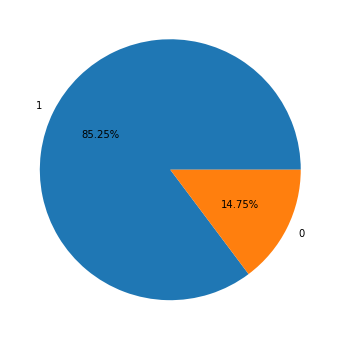

In [26]:
Outcome_label_count = df_label['Outcome'].value_counts().to_frame()

plt.figure(figsize = (6,6))
plt.pie(Outcome_label_count['Outcome'], 
        labels = list(Outcome_label_count.index), 
        autopct = '%.2f%%' )
plt.show()